# 1. Importing Libraries

In [1]:
pip install --upgrade git+https://github.com/stanfordmlgroup/ngboost.git

  Cloning https://github.com/stanfordmlgroup/ngboost.git to /tmp/pip-req-build-5ntelbek
     |████████████████████████████████| 345 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 34.3 MB/s eta 0:00:01
  Created wheel for ngboost: filename=ngboost-0.3.3.dev0-py3-none-any.whl size=39438 sha256=bfdeee7035ce9dde5e73c6194f2f612a04831a56dea9cb7006792db1a337459c
  Stored in directory: /tmp/pip-ephem-wheel-cache-aeh6085f/wheels/f6/4e/06/4cdbf49c1912a0a30a8bf66f369d78b7d575be57289c83a0b9
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=865e3e4eb398a552f08c98a0e839a199ca150c6d8dff6f6650c01ec8f17c04f3
  Stored in directory: /root/.cache/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
Successfully built ngboost autograd
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 215 kB 13.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [5]:
from ngboost import NGBRegressor

# 2. Exploring Dataset

## 2.1 Loading Dataset

In [32]:
#loading dataset
df= pd.read_csv('protein.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
0,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302,17.284
1,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468,6.021
2,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119,9.275
3,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651,15.851
4,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147,7.962


In [7]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
count,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664,7.748528
std,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755,6.118312
min,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000,0.000000
25%,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725,2.305000
50%,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300,5.030000
75%,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800,13.379000
max,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900,20.999000


In [8]:
#shape of our dataset
df.shape

(45730, 10)

In [9]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      45730 non-null  float64
 1   F2      45730 non-null  float64
 2   F3      45730 non-null  float64
 3   F4      45730 non-null  float64
 4   F5      45730 non-null  float64
 5   F6      45730 non-null  float64
 6   F7      45730 non-null  float64
 7   F8      45730 non-null  int64  
 8   F9      45730 non-null  float64
 9   RMSD    45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [10]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
RMSD    0
dtype: int64

## 2.2 Finding variables which are useful for prediction

<AxesSubplot:>

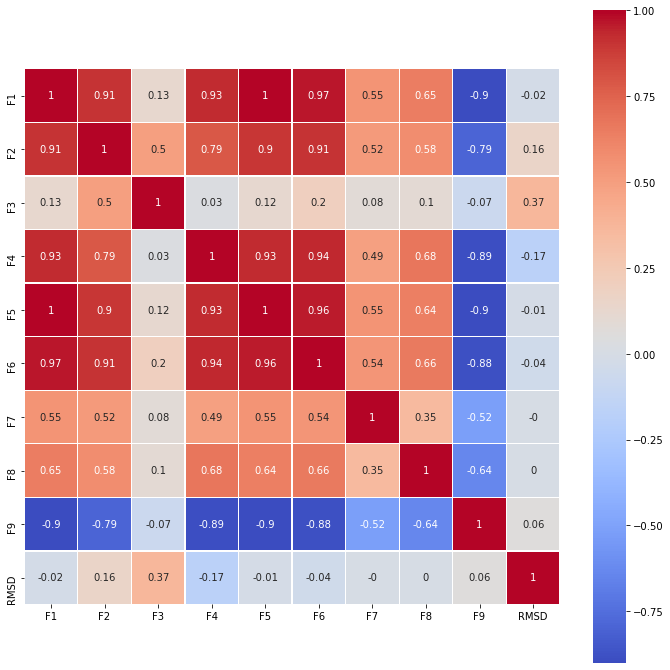

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

In [24]:
#df.drop(["F7"], axis = 1, inplace = True) 

In [33]:
X, Y = df.iloc[:,:-1],df.iloc[:,-1]

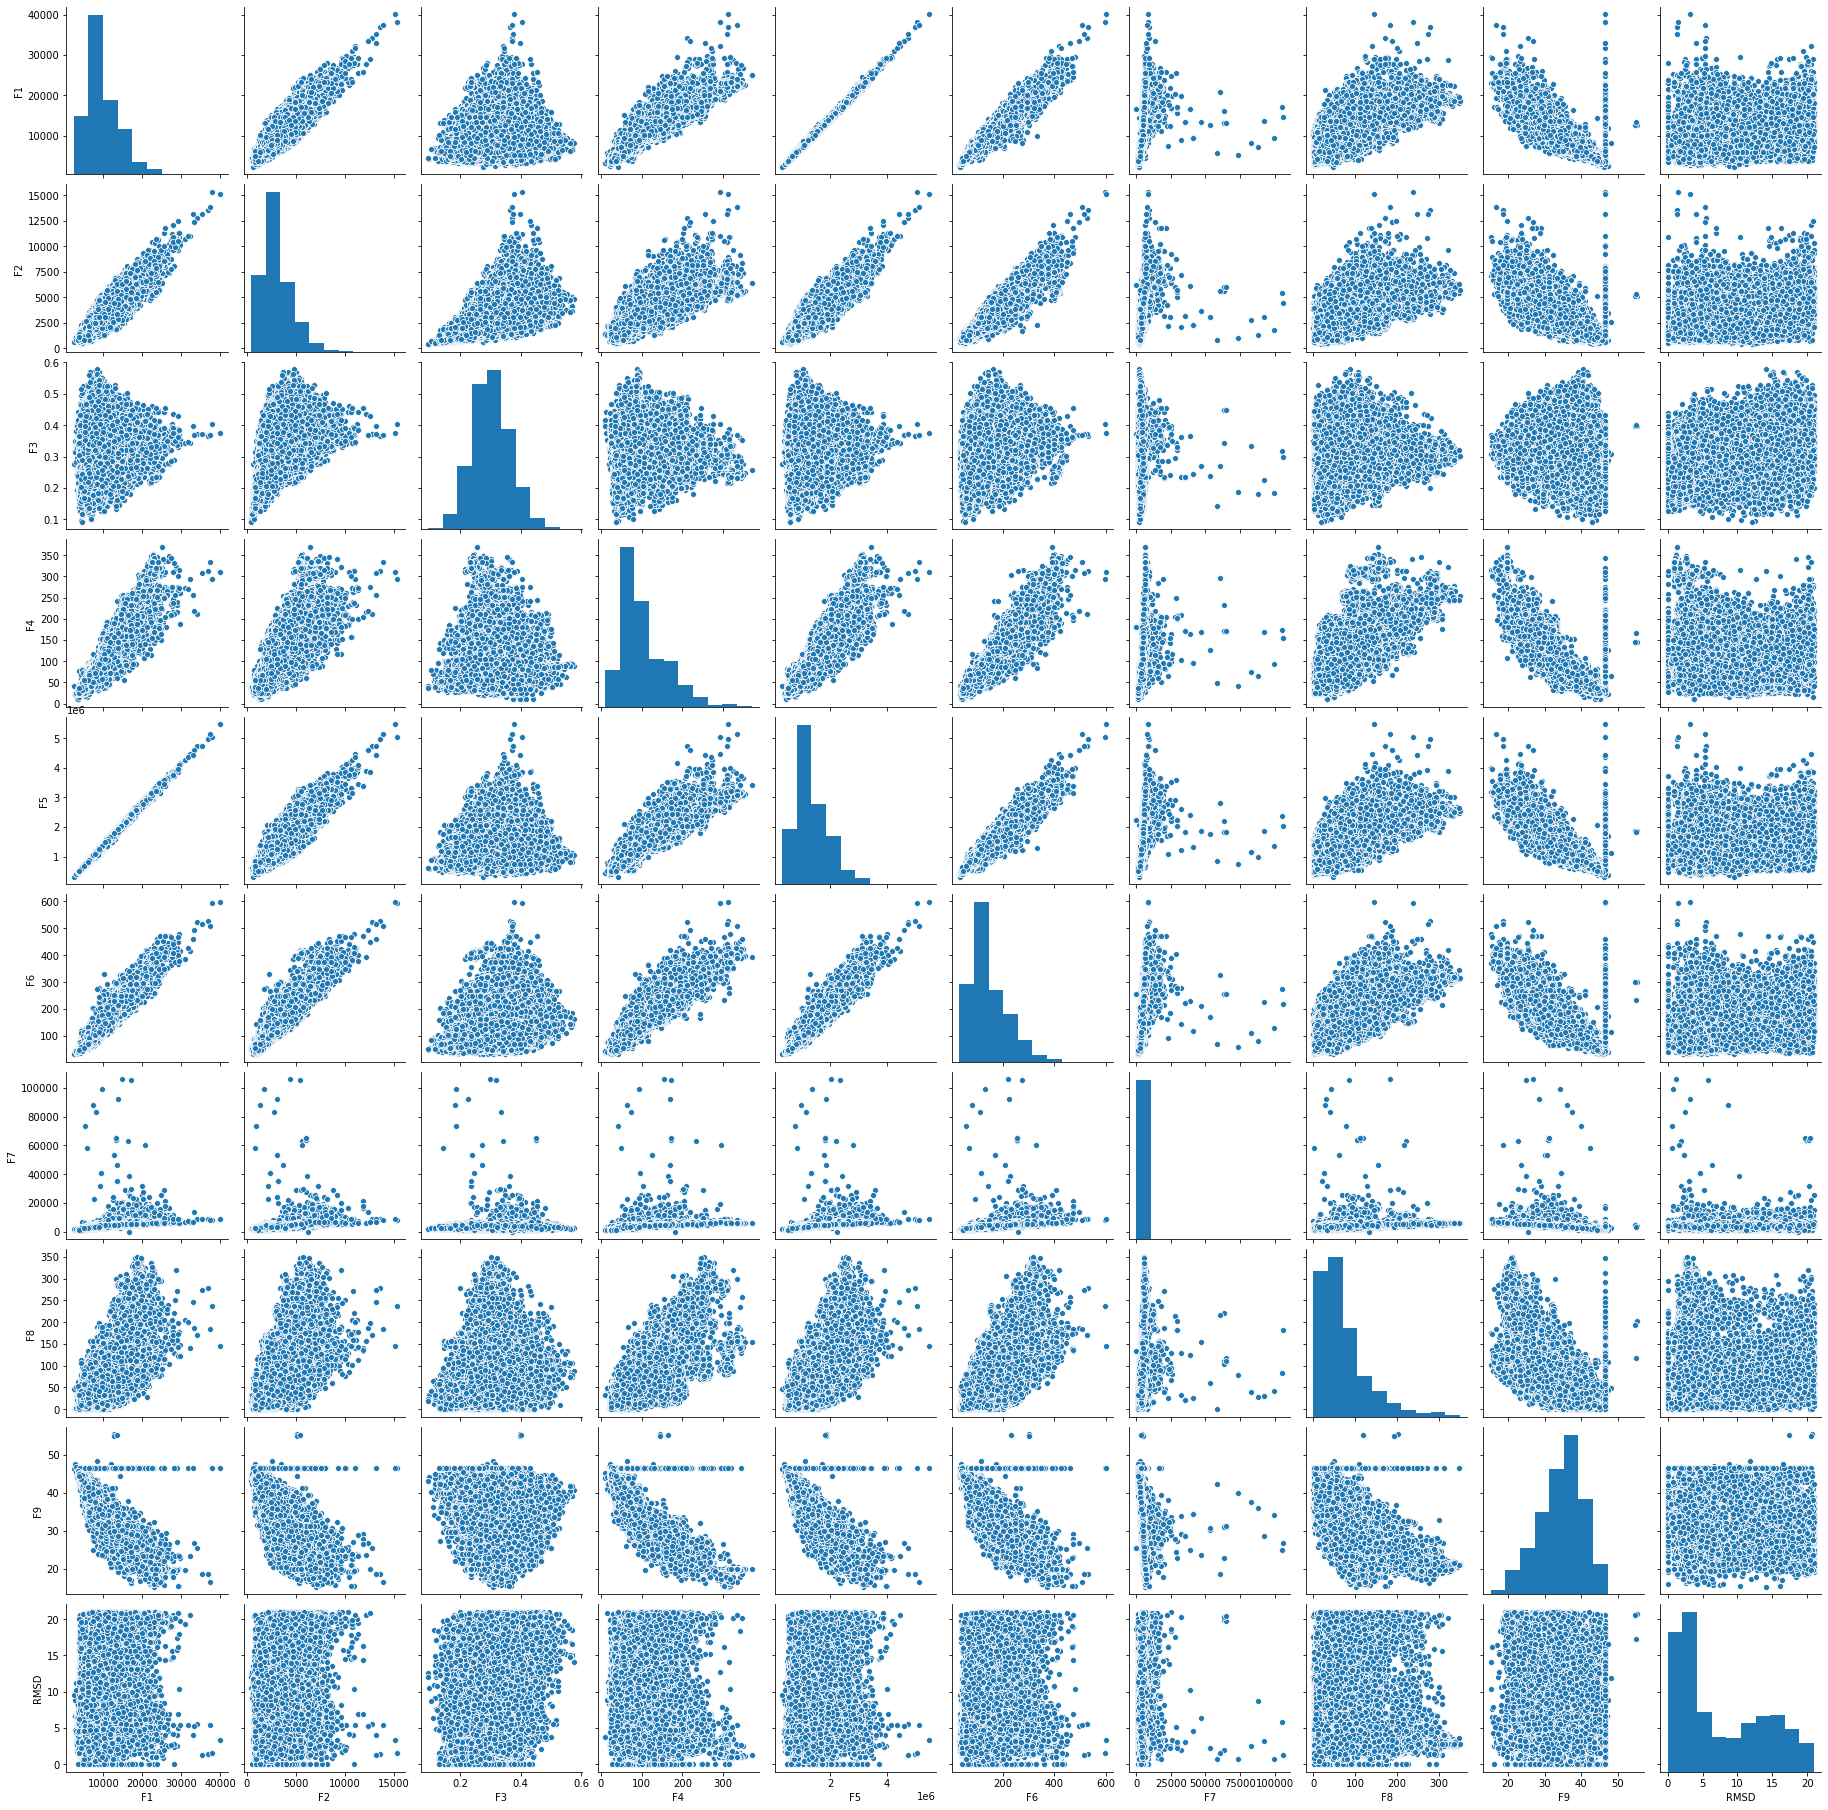

In [11]:
sns.pairplot(data=df)

## 4. Splitting Dataset into Train and Test Set

First, we have divided our data into two sets:

**X** contains all independent variables

**y** contains independent variable MEDV

In [15]:
X.head()

,F1,F2,F3,F4,F5,F6,F9
0,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,27.0302
1,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,38.5468
2,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,38.8119
3,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,39.0651
4,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,39.9147


In [35]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {Y.shape}")

Shape of Dependent Variable X = (45730, 9)
Shape of Independent Variable y = (45730,)


In [34]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (36584, 9)
Shape of X_test = (9146, 9)
Shape of y_train = (36584,)
Shape of y_test = (9146,)


In [36]:
regressor=NGBRegressor()

In [37]:
regressor.fit(X_train,y_train)

[iter 0] loss=3.2295 val_loss=0.0000 scale=1.0000 norm=5.5168
[iter 100] loss=3.0471 val_loss=0.0000 scale=2.0000 norm=9.0149
[iter 200] loss=2.9717 val_loss=0.0000 scale=1.0000 norm=4.1825
[iter 300] loss=2.9331 val_loss=0.0000 scale=1.0000 norm=4.0318
[iter 400] loss=2.9067 val_loss=0.0000 scale=1.0000 norm=3.9390


NGBRegressor(random_state=RandomState(MT19937) at 0x7F32F908B440)

In [38]:
print(regressor.get_params())

{'Base__ccp_alpha': 0.0, 'Base__criterion': 'friedman_mse', 'Base__max_depth': 3, 'Base__max_features': None, 'Base__max_leaf_nodes': None, 'Base__min_impurity_decrease': 0.0, 'Base__min_impurity_split': None, 'Base__min_samples_leaf': 1, 'Base__min_samples_split': 2, 'Base__min_weight_fraction_leaf': 0.0, 'Base__presort': 'deprecated', 'Base__random_state': None, 'Base__splitter': 'best', 'Base': DecisionTreeRegressor(criterion='friedman_mse', max_depth=3), 'Dist': <class 'ngboost.distns.normal.Normal'>, 'Score': <class 'ngboost.scores.LogScore'>, 'col_sample': 1.0, 'learning_rate': 0.01, 'minibatch_frac': 1.0, 'n_estimators': 500, 'natural_gradient': True, 'random_state': RandomState(MT19937) at 0x7F32F908B440, 'tol': 0.0001, 'verbose': True, 'verbose_eval': 100}


In [39]:
Y_preds = regressor.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,Y_preds))
print("RMSE: %f" % (rmse))

RMSE: 4.814131


In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:

## Hyper Parameter Optimization

b1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=1)
b2 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)
b3 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10)
b4 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=15)

n_estimators = [100, 500, 900, 1100, 1500]

minibatch_frac= [1.0, 0.5]
learning_rate=[.01,0.05,0.5]
col_sample=[1.0,0.5,0.7]
#score=['LogScore', 'CRPScore']

hyperparameter_grid = {
    
    'Base': [b1,b2,b3,b4],
    'n_estimators': n_estimators,
    'minibatch_frac': minibatch_frac,
    'learning_rate':learning_rate
    #'score':score

    
}



In [43]:
from sklearn.model_selection import RandomizedSearchCV

ngb = NGBRegressor(verbose=True,natural_gradient=True, tol=0.0001)

random_cv = RandomizedSearchCV(ngb, param_distributions=hyperparameter_grid, cv=10,n_iter=40,n_jobs = -1,
            verbose = 10, 
            return_train_score = True,
            random_state=42,scoring="neg_root_mean_squared_error")
random_cv.fit(X, Y)
random_cv.best_estimator_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 72.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 110.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 115.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 121.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 151.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed

KeyboardInterrupt: 

In [44]:
#best_score = random_cv.best_score_
#best_params = random_cv.best_params_
#print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best params: 


NameError: name 'best_params' is not defined

In [18]:
random_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [45]:
regressor=NGBRegressor(Base=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'), col_sample=0.7,
             learning_rate=0.01, minibatch_frac=0.5, n_estimators=500,
             natural_gradient=True,
             tol=0.0001,
             verbose=True, verbose_eval=100)


In [46]:
regressor.fit(X_train,y_train)

[iter 0] loss=3.2248 val_loss=0.0000 scale=1.0000 norm=5.4886
[iter 100] loss=3.0538 val_loss=0.0000 scale=2.0000 norm=9.1197
[iter 200] loss=2.9798 val_loss=0.0000 scale=2.0000 norm=8.4270
[iter 300] loss=2.9373 val_loss=0.0000 scale=2.0000 norm=8.1188
[iter 400] loss=2.9046 val_loss=0.0000 scale=1.0000 norm=3.9472


NGBRegressor(col_sample=0.7, minibatch_frac=0.5,
             random_state=RandomState(MT19937) at 0x7F32F908B440)

In [63]:
Y_preds = regressor.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(Y_preds)))
print("RMSE: %f" % (rmse))

RMSE: 3.052873


In [18]:
feature_importance_loc = regressor.feature_importances_[0]
feature_importance_loc

array([0.10924872, 0.11097528, 0.1115075 , 0.10629984, 0.10467268,
       0.11837124, 0.10744067, 0.11199789, 0.11948618])

In [17]:
regressor.plot_importance(regressor)

AttributeError: 'NGBRegressor' object has no attribute 'plot_importance'

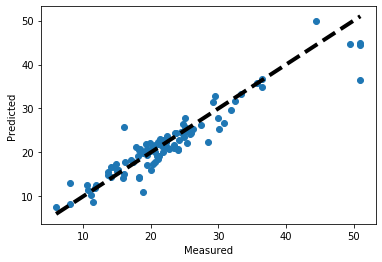

In [47]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
#y_test=np.exp(y_test)
#Y_preds=np.exp(Y_preds)
fig, ax = plt.subplots()
ax.scatter(yy_test, YY_preds)
#ax.scatter(y_test, Y_preds)
ax.plot([yy_test.min(), yy_test.max()], [yy_test.min(), yy_test.max()], 'k--', lw=4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(np.exp(y_test),np.exp(Y_preds))

0.8974821094531391

Text(0.5, 1.0, 'Residual plot')

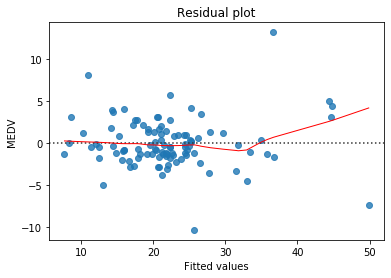

In [48]:
import seaborn as sns
sns.residplot(YY_preds,yy_test, data=df,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

In [229]:
Y_preds=Y_preds.reshape(98,1)

ValueError: cannot reshape array of size 102 into shape (98,1)

In [43]:
YY_preds=np.exp(Y_preds)
yy_test=np.exp(y_test)
yy_train=np.exp(y_train)

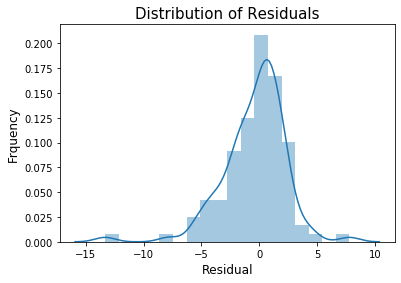

In [24]:
import seaborn as sns

sns.distplot(YY_preds-yy_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

**Observations:**
- *Distribution of Residuals Plot* shows residuals are quite normally distributed.


- From above *Residual Plot*, I do not found any significant pattern in residues (errors or predicition).


- I can conclude that our model is neither under fitting nor over fitting the data.

In [49]:
from sklearn import metrics
r2= metrics.r2_score(yy_test,YY_preds)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.8812732365773196
Adjusted R^2 = 0.8637340556171509


In [50]:
from sklearn import metrics
mse = metrics.mean_squared_error(yy_test,YY_preds)
mae = metrics.mean_absolute_error(yy_test,YY_preds)
rmse = np.sqrt(metrics.mean_squared_error(yy_test,YY_preds))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

Mean Squared Error: 8.706682724165804
Mean Absolute Error: 2.0347902386558516
Root Mean Squared Error: 2.950708851134894


In [237]:
YY_preds.shape

(102,)

In [28]:
import scipy.stats as stats
import math
np.random.seed(10)
sample_size = 102
sample = np.random.choice(a= YY_preds, size = sample_size)
sample_mean = sample.mean()

#_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

#rint("z-critical value:")              # Check the z-critical value
#rint(z_critical)                        
z_critical=1.96
pop_stdev = YY_preds.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(22.86325427928497, 25.853072788084507)


In [29]:
dfc = pd.DataFrame({'Actual': yy_test, 'Predicted': YY_preds})
dfc.head(25)

,Actual,Predicted
173,24.6,24.541250
274,33.4,32.096706
491,14.6,15.994788
72,23.8,24.875122
452,17.1,18.421129
76,21.0,22.946107
316,18.8,19.859775
140,15.0,15.990811
471,20.6,21.981380
500,17.8,21.674842


In [30]:
Y_dists = regressor.pred_dist(X_test)

In [31]:
Y_dists[0:5].params

{'loc': array([3.20035537, 3.4687534 , 2.7722629 , 3.21386818, 2.91349832]),
 'scale': array([0.05878736, 0.03195307, 0.059162  , 0.03245977, 0.06001468])}

In [32]:
dfc = pd.DataFrame({'Actual': yy_test, 'Predicted': YY_preds})
dfc.head(25)

,Actual,Predicted
173,24.6,24.541250
274,33.4,32.096706
491,14.6,15.994788
72,23.8,24.875122
452,17.1,18.421129
76,21.0,22.946107
316,18.8,19.859775
140,15.0,15.990811
471,20.6,21.981380
500,17.8,21.674842


In [33]:
dfc['stddev']=Y_dists.scale

In [34]:
dfc['stddev']=np.exp(dfc['stddev'])

In [35]:
dfc['loc']=Y_dists.loc

In [36]:
dfc['mean']=np.exp(dfc['loc'])

In [53]:
dfc['interval']=1.96*dfc['stddev']

NameError: name 'dfc' is not defined

In [76]:
dfc['Lower Bound']=dfc['mean']-dfc['interval']
dfc['Upper Bound']=dfc['mean']+dfc['interval']

In [69]:
dfc['LSTAT']=X_test.LSTAT

In [77]:
dfc.head(20)

,Actual,Predicted,stddev,loc,mean,interval,Lower Bound,Upper Bound,LSTAT
173,24.6,24.541250,1.060550,3.200355,24.541250,0.714810,23.826439,25.256060,9.04
274,33.4,32.096706,1.032469,3.468753,32.096706,0.695884,31.400822,32.792590,3.53
491,14.6,15.994788,1.060947,2.772263,15.994788,0.715078,15.279709,16.709866,18.07
72,23.8,24.875122,1.032992,3.213868,24.875122,0.696237,24.178885,25.571359,5.52
452,17.1,18.421129,1.061852,2.913498,18.421129,0.715688,17.705441,19.136817,17.27
76,21.0,22.946107,1.046799,3.133148,22.946107,0.705543,22.240565,23.651650,11.97
316,18.8,19.859775,1.068926,2.988696,19.859775,0.720456,19.139320,20.580231,18.33
140,15.0,15.990811,1.043099,2.772014,15.990811,0.703048,15.287763,16.693860,24.16
471,20.6,21.981380,1.053286,3.090196,21.981380,0.709915,21.271465,22.691295,12.87
500,17.8,21.674842,1.082086,3.076152,21.674842,0.729326,20.945516,22.404167,14.33


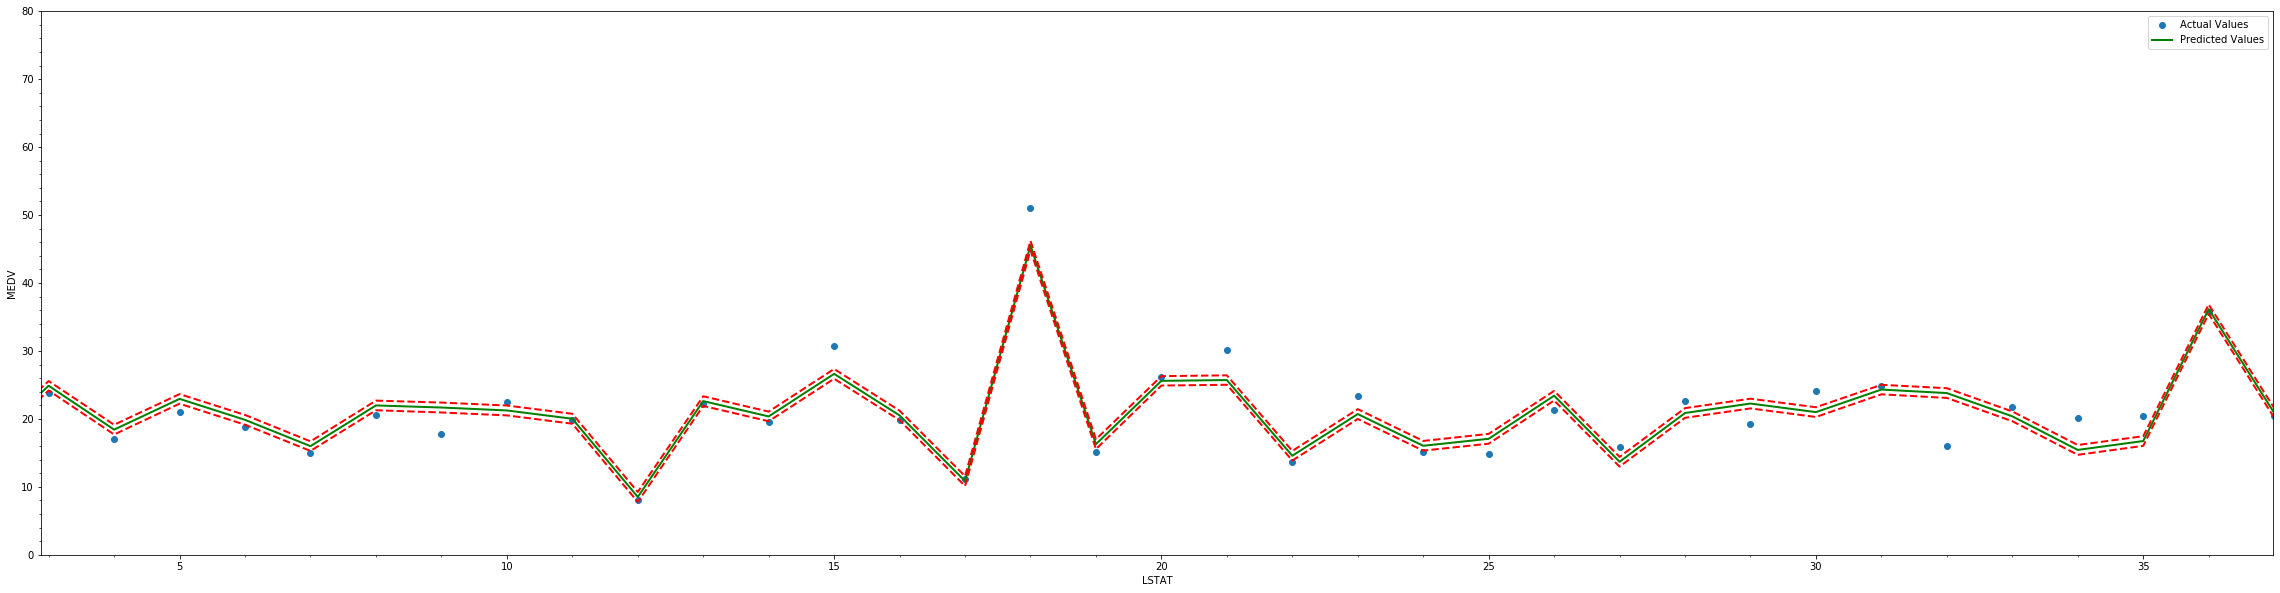

In [78]:
import matplotlib.ticker as ticker
plt.figure(figsize=(40, 10))
ax = plt.subplot(111)
ax.plot(range(102), dfc['Actual'], 'o', label = "Actual Values")
ax.plot(range(102), dfc['Predicted'], '-', lw=2, label = "Predicted Values", color='green')
ax.plot(range(102), dfc['Lower Bound'], 'r--', lw=2)
ax.plot(range(102), dfc['Upper Bound'], 'r--', lw=2)
ax.legend(loc='best');
ax.get_xaxis().set_minor_locator(ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)


ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
ax.set_ylim([0, 80])
ax.set_xlim([dfc['LSTAT'].min(), dfc['LSTAT'].max()])
plt.show()